## 기초통계량

In [1]:
import json
#key:종목 / value:symbol인 딕셔너리 가져오기
stock2code = json.load(open('data/stock2code.json','r'))

naver = stock2code['NAVER']

import FinanceDataReader as fdr
data = fdr.DataReader(naver)
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-10-29,2312,2312,2312,2312,20549,NaN
2002-10-30,2587,2587,2558,2588,853638,0.119377
2002-10-31,2626,2689,2398,2459,1320880,-0.049845
2002-11-01,2520,2599,2215,2305,750761,-0.062627
2002-11-04,2285,2300,2135,2191,692165,-0.049458
...,...,...,...,...,...,...
2022-04-01,340000,340500,335500,335500,446987,-0.014684
2022-04-04,335500,339000,332000,338000,283687,0.007452
2022-04-05,340500,343000,338000,342500,389951,0.013314


In [2]:
#data의 간단한 통계정보 확인
data.describe()

,Open,High,Low,Close,Volume,Change
count,4808.000000,4808.000000,4808.000000,4808.000000,4.808000e+03,4807.000000
mean,108344.687188,109936.254160,106682.574043,108767.249376,2.979681e+05,0.001390
std,95938.748918,97137.453774,94653.722430,95538.865542,3.015586e+05,0.027071
min,0.000000,0.000000,0.000000,1923.000000,0.000000e+00,-0.139536
25%,42533.000000,43435.250000,41654.000000,43655.250000,1.187672e+05,-0.014155
50%,78003.000000,79322.500000,76121.000000,78632.500000,2.021370e+05,0.000000
75%,151014.000000,153215.250000,149210.000000,150859.750000,3.653070e+05,0.014775
max,460000.000000,465000.000000,452000.000000,454000.000000,5.304519e+06,0.145978


In [3]:
print("****MEDIAN****")
print(data.median())
print()

print("****산술평균****")
print(data.mean())
print()
print("****산술평균(axis=1)****")
print(data[['Open','High','Low','Close']].mean(axis=1))
print()
print("****최빈값****")
print(data.mode())
print()
print("****분산****")
print(data.var())
print()
print("****표준편차****")
print(data.std())
print()
print("****왜도****")
print(data.skew())
print()
print("****첨도****")
print(data.kurtosis())

****MEDIAN****
Open       78003.0
High       79322.5
Low        76121.0
Close      78632.5
Volume    202137.0
Change         0.0
dtype: float64

****산술평균****
Open      108344.687188
High      109936.254160
Low       106682.574043
Close     108767.249376
Volume    297968.120424
Change         0.001390
dtype: float64

****산술평균(axis=1)****
Date
2002-10-29      2312.00
2002-10-30      2580.00
2002-10-31      2543.00
2002-11-01      2409.75
2002-11-04      2227.75
                ...    
2022-04-01    337875.00
2022-04-04    336125.00
2022-04-05    341000.00
2022-04-06    333375.00
2022-04-07    323375.00
Length: 4808, dtype: float64

****최빈값****
   Open  High  Low  Close  Volume  Change
0     0     0    0  92130       0     0.0

****분산****
Open      9.204244e+09
High      9.435685e+09
Low       8.959327e+09
Close     9.127675e+09
Volume    9.093760e+10
Change    7.328606e-04
dtype: float64

****표준편차****
Open       95938.748918
High       97137.453774
Low        94653.722430
Close      9553

### 기하평균

In [9]:
#산술평균
data.Change.loc['2022-01-01':'2022-01-31'].mean()

-0.009759938636980953

In [10]:
len(data.Change.loc['2022-01-01':'2022-01-31'])

20

In [11]:
#기하평균
((data.Change.loc['2022-01-01':'2022-01-31'] + 1).prod()) ** (1/22)  - 1

-0.009033666087845504

In [12]:
def geo_mean(x):
    return (x +1).prod() ** (1/len(x)) - 1

In [13]:
print("기하평균", geo_mean(data.Change))
print("산술평균", data.Change.mean())

기하평균 0.0010265931779946946
산술평균 0.0013903297755540301


## 이동평균

### 단순이동평균과 지수이동평균

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

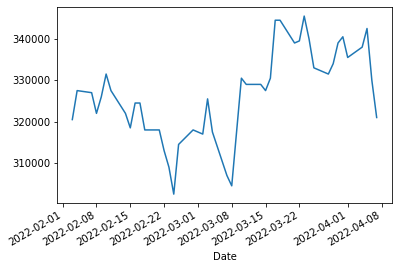

In [17]:
data.Close['2022-02-01':].plot(label='close')

<AxesSubplot:xlabel='Date'>

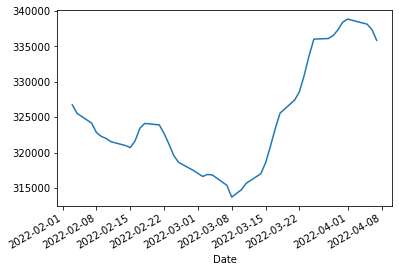

In [18]:
data.Close.rolling(12).mean().loc['2022-02-01':].plot(label='sma12')

<AxesSubplot:xlabel='Date'>

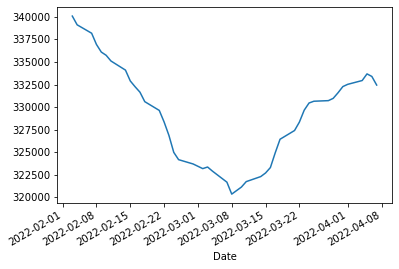

In [19]:
data.Close.ewm(12).mean().loc['2022-02-01':].plot(label='ema12')

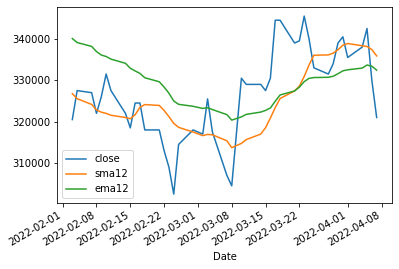

In [16]:
data.Close['2022-02-01':].plot(label='close')
data.Close.rolling(12).mean().loc['2022-02-01':].plot(label='sma12') # 12영업일 기준으로  단순이동평균
data.Close.ewm(12).mean().loc['2022-02-01':].plot(label='ema12') # 12영업일 기준으로  지수이동평균 - 최근 데이터에 더 민감하게 반영
plt.legend()
plt.show()

## 상관

- 공분산
- 상관계수

In [21]:
import pandas as pd

In [28]:
df1 = fdr.DataReader(stock2code['삼성에스디에스']).Close
df2 = fdr.DataReader(stock2code['코나아이']).Close
df = pd.concat([df1, df2], axis=1).dropna()
df

,Close,Close
Date,,
2014-11-14,327500.0,62391
2014-11-17,338500.0,60077
2014-11-18,366000.0,60925
2014-11-19,371000.0,64319
2014-11-20,398000.0,62159
...,...,...
2022-04-01,139500.0,25600
2022-04-04,139000.0,26000
2022-04-05,140000.0,26250


In [29]:
df1 = fdr.DataReader(stock2code['삼성에스디에스']).Close
df2 = fdr.DataReader(stock2code['코나아이']).Close
df = pd.concat([df1, df2], axis=1).dropna()
df.columns = ['ssSDS','Kona']
df

,ssSDS,Kona
Date,,
2014-11-14,327500.0,62391
2014-11-17,338500.0,60077
2014-11-18,366000.0,60925
2014-11-19,371000.0,64319
2014-11-20,398000.0,62159
...,...,...
2022-04-01,139500.0,25600
2022-04-04,139000.0,26000
2022-04-05,140000.0,26250


In [30]:
#공분산
df.cov()

,ssSDS,Kona
ssSDS,2.056236e+09,5.240205e+08
Kona,5.240205e+08,2.903498e+08


In [46]:
#공분산 값과 표준편차값으로 상관계수 연산
df.cov().iloc[0,1] / (df.ssSDS.std() * df.Kona.std())

0.6781895426913421

In [25]:
#상관계수
df.corr()

,ssSDS,Kona
ssSDS,1.00000,0.67819
Kona,0.67819,1.00000
